In [39]:
%pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [1]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTENC
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('Autoclave batches dataset (2).csv')
df.head()

C:\Users\91751\AppData\Local\Temp\ipykernel_23400\4230024959.py:1: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Autoclave batches dataset (2).csv')


,Time,TP,TE1,TE2,TE3,TE4,TE6,Program Number,Phase,Min_ster_Temp,...,TER2,TER3,TER4,TPR1,TE7,TER6,TPR2,TPR3,TPR4,TE17
0,01-09-2019 08:58,1.03,19.6,68.3,70.8,69.9,22.7,8,PREPARE AUTOCLAVE,122.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-09-2019 08:54,1.04,19.8,86.5,89.5,88.6,22.9,8,PREPARE AUTOCLAVE,122.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-09-2019 08:58,1.04,19.8,86.5,89.5,88.6,22.9,8,DEPRESSURIZE BY VACUUM PUMP,122.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-09-2019 08:58,0.87,32.1,87,90,89.1,22.9,8,DEPRESSURIZE BY VACUUM PUMP,122.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-09-2019 08:58,0.70,44.3,87.3,90.2,89.3,22.9,8,DEPRESSURIZE BY VACUUM PUMP,122.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042808 entries, 0 to 1042807
Data columns (total 25 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Time            1042808 non-null  object 
 1   TP              1042808 non-null  float64
 2   TE1             977250 non-null   object 
 3   TE2             1042808 non-null  object 
 4   TE3             1042797 non-null  object 
 5   TE4             977239 non-null   object 
 6   TE6             35418 non-null    float64
 7   Program Number  1042808 non-null  int64  
 8   Phase           1042808 non-null  object 
 9   Min_ster_Temp   1042808 non-null  float64
 10  Max_ster_Temp   1042808 non-null  float64
 11  Batch Status    1042808 non-null  object 
 12  Log name        1042808 non-null  object 
 13  PAD             833682 non-null   float64
 14  TER1            949234 non-null   float64
 15  TER2            947121 non-null   float64
 16  TER3            947121 non-null   fl

,TP,TE6,Program Number,Min_ster_Temp,Max_ster_Temp,PAD,TER1,TER2,TER3,TER4,TPR1,TE7,TER6,TPR2,TPR3,TPR4,TE17
count,1.042808e+06,35418.000000,1.042808e+06,1.042808e+06,1.042808e+06,833682.000000,949234.000000,947121.000000,947121.000000,947121.000000,946382.000000,810482.000000,1444.000000,2113.0,2113.0,2113.0,2125.000000
mean,1.072068e+00,93.258143,1.461163e+01,1.206458e+02,1.221729e+02,0.325081,81.607019,108.455522,108.383718,107.421396,1.037863,82.791153,51.644183,0.0,0.0,0.0,7.728988
std,8.928870e-01,29.836703,4.423187e+00,7.135971e+00,2.389956e+00,0.353771,28.336381,12.607242,12.874512,13.373193,0.789205,32.240053,15.119251,0.0,0.0,0.0,1.438758
min,2.000000e-02,0.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000,9.900000,17.500000,15.700000,16.100000,0.030000,22.500000,43.700000,0.0,0.0,0.0,6.400000
25%,1.600000e-01,70.100000,1.600000e+01,1.217000e+02,1.223000e+02,0.110000,61.200000,104.100000,103.900000,102.300000,0.170000,52.600000,44.200000,0.0,0.0,0.0,6.800000
50%,1.100000e+00,99.900000,1.600000e+01,1.217000e+02,1.224000e+02,0.200000,72.900000,109.500000,109.500000,108.500000,1.120000,76.900000,47.900000,0.0,0.0,0.0,7.300000
75%,2.070000e+00,121.300000,1.700000e+01,1.217000e+02,1.224000e+02,0.360000,121.200000,121.400000,121.600000,121.500000,2.060000,117.100000,49.025000,0.0,0.0,0.0,8.000000
max,1.430000e+02,145.500000,2.100000e+01,1.352000e+02,1.362000e+02,3.270000,124.300000,124.300000,124.400000,124.300000,2.250000,135.300000,105.200000,0.0,0.0,0.0,16.500000


In [4]:
# There are 35 unique values in the 'Phase' column
# Count the number of rows where Phase is equal to "CYCLE END"
count_cycle_end = df[df['Phase'] == 'CYCLE END'].shape[0]
# Count the number of rows with Phase as "CYCLE END" and Batch Status as "OK"
count_cycle_end_ok = df[(df['Phase'] == 'CYCLE END') & (df['Batch Status'] == 'OK')].shape[0]

# Count the number of rows with Phase as "CYCLE END" and Batch Status as "FAILED"
count_cycle_end_failed = df[(df['Phase'] == 'CYCLE END') & (df['Batch Status'] == 'FAILED')].shape[0]

# Print the count
print(f"Number of Batches': {count_cycle_end}")
# Print the counts
print(f"Number of Batches passes: {count_cycle_end_ok}")
print(f"Number of Batches failed: {count_cycle_end_failed}")

Number of Batches': 1860
Number of Batches passes: 1754
Number of Batches failed: 106


In [5]:
failed_index = df[df['Batch Status'] == 'FAILED'].index[-1]
failed_time = df.loc[failed_index, 'Time']
print(f"Time of first failed batch from bottom: {failed_time}")


Time of first failed batch from bottom: 12/29/2020 1:55


In [6]:

df['DataLabel'] = 0

# Initialize the first label
current_label = 1

# Now we'll iterate through the dataframe.
# Whenever we encounter 'CYCLE END' in the 'Phase' column,
# we'll increment the 'DataLabel' for subsequent rows.

for index, row in df.iterrows():
    df.at[index, 'DataLabel'] = current_label
    if row['Phase'] == 'CYCLE END':
        current_label += 1





In [7]:
# find all the column names
column_names = df.columns
# Print the column names
print(column_names)

Index(['Time', 'TP', 'TE1', 'TE2', 'TE3', 'TE4', 'TE6', 'Program Number',
       'Phase', 'Min_ster_Temp', 'Max_ster_Temp', 'Batch Status', 'Log name',
       'PAD', 'TER1', 'TER2', 'TER3', 'TER4', 'TPR1', 'TE7', 'TER6', 'TPR2',
       'TPR3', 'TPR4', 'TE17', 'DataLabel'],
      dtype='object')


In [8]:
# make an excel sheet of Data Label = 16 with all columns and rows present
df_16 = df[df['DataLabel'] == 16]
df_16.to_csv('DataLabel_16.csv')


In [9]:
# make an excel sheet of Data Label = 17 with all columns and rows present
df_17 = df[df['DataLabel'] == 17]
df_17.to_csv('DataLabel_17.csv')

# make an excel sheet of Data Label = 1 with all columns and rows present
df_1 = df[df['DataLabel'] == 1]

In [31]:
# get all rows for data labels is 36
df_36 = df[df['Data Label'] == 36]
# Print the shape of the DataFrame
print(df_36.shape)
# Check whether Phase = Sterilization is present
print(df_36['Phase'].value_counts())
# find all the phases unique values
phases = df_36['Phase'].unique()
# Print the unique values of the 'Phase' column
print(phases)
# do similar for data lavel 37
df_37 = df[df['Data Label'] == 37]
print(df_37['Phase'].value_counts())
phases = df_37['Phase'].unique()
print(phases)


(212, 26)
CHAMBER VACUUM       160
DEPRESSURIZE BY       25
RETURN TO             25
PREPARE AUTOCLAVE      2
Name: Phase, dtype: int64
['PREPARE AUTOCLAVE' 'DEPRESSURIZE BY' 'CHAMBER VACUUM' 'RETURN TO']
CHAMBER PRESSURE          182
PRESSURE STABILIZATION     92
PRESSURIZE CHAMBER         24
RETURN TO                  15
PREPARE AUTOCLAVE           2
Name: Phase, dtype: int64
['PREPARE AUTOCLAVE' 'PRESSURIZE CHAMBER' 'PRESSURE STABILIZATION'
 'CHAMBER PRESSURE' 'RETURN TO']
0    318
Name: Batch Status, dtype: int64
1    348
Name: Batch Status, dtype: int64


In [24]:

from sklearn.preprocessing import LabelEncoder

# Apply label encoding to 'Batch Status'
label_encoder = LabelEncoder()
df['Batch Status'] = label_encoder.fit_transform(df['Batch Status'])

# Check the encoding mapping
print("Encoding mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Now 'Batch Status' column will have 1 for 'OK' and 0 for 'FAILED'
print(df['Batch Status'].value_counts())

Encoding mapping: {'FAILED': 0, 'OK': 1}
1    994050
0     48758
Name: Batch Status, dtype: int64


In [32]:
cycle_end_info = df[df['Phase'] == 'CYCLE END'][['Data Label', 'Program Number', 'Batch Status']]

# Group by 'Data Label' and calculate the mean of 'TP' and 'TE1'
avg_values = df.groupby('Data Label')[['TP']].mean()
avg_values1 = df.groupby('Data Label')[['TE1']].mean()
avg_values2 = df.groupby('Data Label')[['TE2']].mean()
avg_values3 = df.groupby('Data Label')[['TE3']].mean()
avg_values4 = df.groupby('Data Label')[['TE4']].mean()
# Merge avg_values with cycle_end_info on 'Data Label' to create a new DataFrame
result_df = avg_values.merge(cycle_end_info, on='Data Label', how='left')
result_df = result_df.merge(avg_values1, on='Data Label', how='left')
result_df = result_df.merge(avg_values2, on='Data Label', how='left')
result_df = result_df.merge(avg_values3, on='Data Label', how='left')
result_df = result_df.merge(avg_values4, on='Data Label', how='left')
# delete rows with datalabel = 0
result_df = result_df[result_df['Data Label'] != 0]
print(result_df.reset_index(drop=True))
# Display the new DataFrame with the average values of 'TP', 'TE1', 'Program Number', and 'Batch Status' for each 'Data Label'
print(result_df)


      Data Label        TP  Program Number  Batch Status
0              1  1.552642             NaN           NaN
1              2  1.100833             NaN           NaN
2              3  1.074781             NaN           NaN
3              4  1.074157             NaN           NaN
4              5  1.962297             NaN           NaN
...          ...       ...             ...           ...
1854        1856  1.074980             NaN           NaN
1855        1857  0.166238             NaN           NaN
1856        1858  0.953750             NaN           NaN
1857        1859  0.972108             NaN           NaN
1858        1860  1.072443             NaN           NaN

[1859 rows x 4 columns]
      Data Label        TP  Program Number  Batch Status
1860           1  1.552642             NaN           NaN
1861           2  1.100833             NaN           NaN
1862           3  1.074781             NaN           NaN
1863           4  1.074157             NaN           NaN
1864  

C:\Users\91751\AppData\Local\Temp\ipykernel_13304\1767910840.py:5: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  avg_values1 = df.groupby('Data Label')[['TE1']].mean()
C:\Users\91751\AppData\Local\Temp\ipykernel_13304\1767910840.py:6: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  avg_values2 = df.groupby('Data Label')[['TE2']].mean()
C:\Users\91751\AppData\Local\Temp\ipykernel_13304\1767910840.py:7: FutureWarning: Dropping invalid columns in DataFrameGroupBy.mean is deprecated. In a future version, a TypeError will be raised. Before calling .mean, select only columns which should be valid for the function.
  avg_values3 = df.groupby('Data Label')[['TE3']].me

In [28]:
import pandas as pd

# Assuming you have a DataFrame named df with columns including 'Data Label', 'Phase', 'Program Number', and 'Batch Status'

# Filter rows where Phase is 'CYCLE END' and select only 'Data Label', 'Program Number', and 'Batch Status' columns
cycle_end_info = df[df['Phase'] == 'CYCLE END'][['Data Label', 'Program Number', 'Batch Status']]

# Group by 'Data Label' and calculate the mean of 'TE1', 'TE2', 'TE3', 'TE4', and 'TP'
avg_values = df.groupby('Data Label')[['TE1', 'TE2', 'TE3', 'TE4', 'TP']].mean()

# Merge avg_values with cycle_end_info on 'Data Label' to create a new DataFrame
result_df = avg_values.merge(cycle_end_info, on='Data Label', how='left')

# Reset index to make 'Data Label' a column again
result_df.reset_index(inplace=True)

# Display the new DataFrame with the average values of 'TE1', 'TE2', 'TE3', 'TE4', 'TP', 'Program Number', and 'Batch Status' for each 'Data Label'
# delete rows with datalabel = 0
result_df = result_df[result_df['Data Label'] != 0]
print(result_df.reset_index(drop=True))

      index  Data Label        TP  Program Number  Batch Status
0      1860           1  1.552642             NaN           NaN
1      1861           2  1.100833             NaN           NaN
2      1862           3  1.074781             NaN           NaN
3      1863           4  1.074157             NaN           NaN
4      1864           5  1.962297             NaN           NaN
...     ...         ...       ...             ...           ...
1854   3714        1856  1.074980             NaN           NaN
1855   3715        1857  0.166238             NaN           NaN
1856   3716        1858  0.953750             NaN           NaN
1857   3717        1859  0.972108             NaN           NaN
1858   3718        1860  1.072443             NaN           NaN

[1859 rows x 5 columns]


In [11]:

# Filter rows where Phase is 'STERILIZATION' and calculate the mean temperature for 'STERILIZATION' phase
sterilization_avg_temp = df[df['Phase'] == 'STERILIZATION'].groupby('Data Label')['TE1', 'TE2', 'TE3', 'TE4', 'TE6', 'TP'].mean().reset_index()

# Filter rows where Phase is 'CYCLE END' and select only 'Data Label' and 'Program Number' columns
cycle_end_program = df[df['Phase'] == 'CYCLE END'][['Data Label', 'Program Number']]

# Drop duplicate rows in case there are multiple 'CYCLE END' phases for the same 'Data Label'
cycle_end_program = cycle_end_program.drop_duplicates(subset='Data Label')

# Merge sterilization_avg_temp and cycle_end_program on 'Data Label' to create a new DataFrame
result_df = sterilization_avg_temp.merge(cycle_end_program, on='Data Label', how='left')

# Display the DataFrame with the average sterilization temperature and program number for each 'Data Label'
print(result_df.head())


   Data Label        TE6        TP  Program Number
0           1    0.00000  2.110000             NaN
1           2  121.87623  2.109180             NaN
2           3        NaN  2.108934             NaN
3           4        NaN  2.109024             NaN
4           5        NaN  2.109754             NaN


C:\Users\91751\AppData\Local\Temp\ipykernel_13304\3396278759.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  sterilization_avg_temp = df[df['Phase'] == 'STERILIZATION'].groupby('Data Label')['TE1', 'TE2', 'TE3', 'TE4', 'TE6', 'TP'].mean().reset_index()


In [7]:

# Filter dataframe to include only rows where the 'Phase' column is 'CYCLE END'
cycle_end_data = df[df['Phase'] == 'CYCLE END']

# Group by 'Program Number' and count the number of unique program numbers
unique_program_numbers_per_phase = cycle_end_data.groupby('Program Number').size()

# Count OK and FAILED batches for each Program Number
ok_failed_counts = cycle_end_data.groupby(['Program Number', 'Batch Status']).size().unstack(fill_value=0)
ok_failed_counts['Batch Status'] = ok_failed_counts.sum(axis=1)

# Merge with the count of unique program numbers
result_df = unique_program_numbers_per_phase.reset_index(name='Total CYCLE END').merge(ok_failed_counts, on='Program Number', how='left')

# Merge with the count of unique program numbers
result_df = unique_program_numbers_per_phase.reset_index(name='Total CYCLE END').merge(ok_failed_counts, on='Program Number', how='left')

# Calculate percentage of failed batches
result_df['Percentage Failed'] = round((result_df['FAILED'] / result_df['Total CYCLE END']) * 100, 1)

result_df.drop('Batch Status', axis=1, inplace=True)
result_df.rename(columns={'Total CYCLE END': 'Total Batches', 'OK': 'OK', 'FAILED': 'FAILED', 'Percentage Failed': 'Percentage Failed'}, inplace=True)
result_df.dropna(inplace=True)

result_df.set_index('Program Number')
result_df

,Program Number,Total Batches,FAILED,OK,Percentage Failed
0,1,164,5,159,3.0
1,2,101,13,88,12.9
2,3,17,2,15,11.8
3,4,4,1,3,25.0
4,5,23,3,20,13.0
5,6,3,0,3,0.0
6,7,3,1,2,33.3
7,8,77,7,70,9.1
8,9,4,1,3,25.0
9,10,4,1,3,25.0


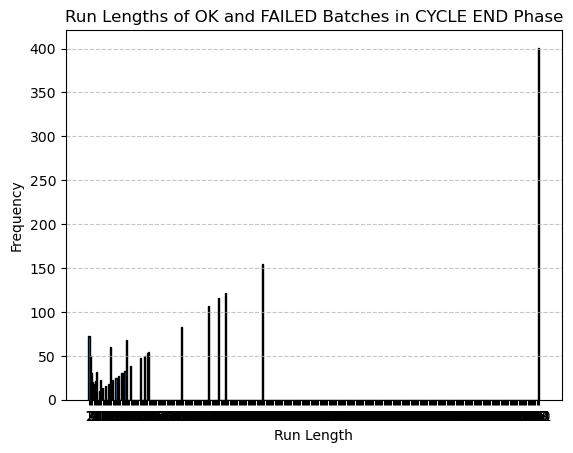

In [8]:

# Filter the dataframe to include only rows where the 'Phase' column is 'CYCLE END'
cycle_end_data = df[df['Phase'] == 'CYCLE END']

# Create a list to store the modified run lengths of OK and FAILED batches
modified_run_lengths = {'OK': [], 'FAILED': []}

# Initialize variables to keep track of the current run length
current_status = None
current_length = 0

# Iterate through the Batch status column for the CYCLE END phase
for status in cycle_end_data['Batch Status']:
    if status == 'OK' or status == 'FAILED':
        # If the status changes or it's the first row, update the run length
        if current_status is None or current_status != status:
            if current_status is not None:
                modified_run_lengths[current_status].append(current_length)
            current_status = status
            current_length = 1
        else:
            current_length += 1

# Append the last run length
if current_status is not None:
    modified_run_lengths[current_status].append(current_length)

# Create a list to store the modified run length data
modified_data = []

# Append the modified run length data for OK and FAILED batches
for status in ['OK', 'FAILED']:
    for length in modified_run_lengths[status]:
        modified_data.extend([length] * length)

# Plot a histogram of the modified run lengths
plt.hist(modified_data, bins=range(1, max(modified_data) + 2), align='left', edgecolor='black')
plt.xlabel('Run Length')
plt.ylabel('Frequency')
plt.title('Run Lengths of OK and FAILED Batches in CYCLE END Phase')
plt.xticks(range(1, max(modified_data) + 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [9]:
df = df.drop(columns=['TER6', 'TPR2' ,'TPR3', 'TPR4' ,'TE17'], axis=1)


In [10]:
df.isnull().sum()
# to find total no. of rows in the dataframe
print(df.shape[0])
print(df.isnull().sum())

1042808
Time                    0
TP                      0
TE1                 65558
TE2                     0
TE3                    11
TE4                 65569
TE6               1007390
Program Number          0
Phase                   0
Min_ster_Temp           0
Max_ster_Temp           0
Batch Status            0
Log name                0
PAD                209126
TER1                93574
TER2                95687
TER3                95687
TER4                95687
TPR1                96426
TE7                232326
Data Label              0
dtype: int64


In [12]:
# coerce the error and make it float type TE1 
# prompt: convert datatype of TE1 to float and do error coerce

df['TE1'] = pd.to_numeric(df['TE1'], errors='coerce').astype(float)
df['TE2'] = pd.to_numeric(df['TE2'], errors='coerce').astype(float)
df['TE3'] = pd.to_numeric(df['TE3'], errors='coerce').astype(float)
df['TE4'] = pd.to_numeric(df['TE4'], errors='coerce').astype(float)


In [13]:
from sklearn.impute import SimpleImputer
import pandas as pd
# Create an imputer object with the strategy as 'mean'
imputer = SimpleImputer(strategy='mean')

# Impute the average values of TE2 and TE3 in the null spaces of TE1 and TE4
df[['TE1', 'TE4']] = imputer.fit_transform(df[['TE2', 'TE3']])

# Check the updated DataFrame
print(df.isnull().sum())


Time                    0
TP                      0
TE1                     0
TE2                    35
TE3                    51
TE4                     0
TE6               1007390
Program Number          0
Phase                   0
Min_ster_Temp           0
Max_ster_Temp           0
Batch Status            0
Log name                0
PAD                209126
TER1                93574
TER2                95687
TER3                95687
TER4                95687
TPR1                96426
TE7                232326
Data Label              0
dtype: int64


In [14]:

def get_net_time_by_data_label(df, excluded_data_label='0'):
    time_by_label = {}
    for data_label in df['Data Label'].unique():
        subset_df = df[df['Data Label'] == data_label]
        start_time = subset_df['Time'].iloc[0]
        end_time = subset_df['Time'].iloc[-1]

        # Calculate net time difference
        net_time = end_time - start_time

        # Extract net time duration in seconds
        net_time_seconds = net_time.total_seconds()

        # Extract net time duration in hours and minutes
        net_time_hours = int(net_time_seconds // 3600)
        net_time_minutes = int((net_time_seconds % 3600) // 60)

        program_number = subset_df['Program Number'].iloc[0]

        time_by_label[data_label] = (program_number, net_time_hours, net_time_minutes)

    return time_by_label

time_by_label = get_net_time_by_data_label(df, excluded_data_label='0')

for data_label, time in time_by_label.items():
    program_number, net_hours, net_minutes = time
    print(f"Cycle {data_label}: Program Number - {program_number}, Net Time - {net_hours:02d} hours, {net_minutes:02d} minutes")


TypeError: unsupported operand type(s) for -: 'str' and 'str'

Clustering algorithm


In [15]:
X = df[["TP","TE1", "TE2", "TE3", "TE4", "TE6"]]
X.info()
# convert the Dtype to float 64 for all the columns, make error = coerce  
X = X.apply(pd.to_numeric, errors='coerce')
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042808 entries, 0 to 1042807
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   TP      1042808 non-null  float64
 1   TE1     1042808 non-null  float64
 2   TE2     1042773 non-null  float64
 3   TE3     1042757 non-null  float64
 4   TE4     1042808 non-null  float64
 5   TE6     35418 non-null    float64
dtypes: float64(6)
memory usage: 47.7 MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042808 entries, 0 to 1042807
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   TP      1042808 non-null  float64
 1   TE1     1042808 non-null  float64
 2   TE2     1042773 non-null  float64
 3   TE3     1042757 non-null  float64
 4   TE4     1042808 non-null  float64
 5   TE6     35418 non-null    float64
dtypes: float64(6)
memory usage: 47.7 MB


In [16]:
from sklearn.impute import SimpleImputer

# Assuming X is your dataset with NaN values
# Create an imputer object with the strategy you prefer (e.g., mean, median, most_frequent)
imputer = SimpleImputer(strategy='mean')

# Fit the imputer to your data
imputer.fit(X)

# Transform the data by replacing NaN values with the chosen strategy
X_imputed = imputer.transform(X)


In [17]:
X.isnull().sum()

TP           0
TE1          0
TE2         35
TE3         51
TE4          0
TE6    1007390
dtype: int64

In [18]:
X_dropna = X.dropna()


KMEANS


In [54]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.cluster import KMeans


In [ ]:
%pip install yellowbrick

In [30]:
from yellowbrick.cluster import KElbowVisualizer

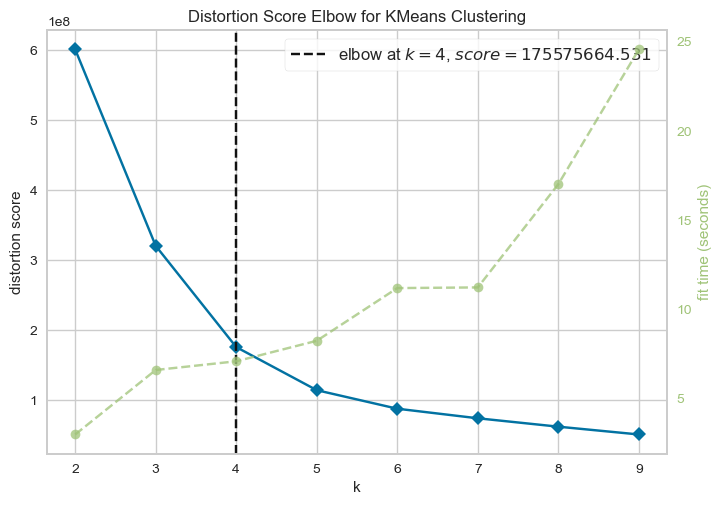

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:


# Assuming X is your input data with NaN values

# Create a pipeline with an imputer and KMeans
pipeline = make_pipeline(SimpleImputer(strategy='mean'), KMeans())

# K-means clustering
visualizer = KElbowVisualizer(pipeline.named_steps['kmeans'], k=(2,10))  # accessing KMeans estimator via the pipeline
visualizer.fit(X_imputed)
visualizer.show()


In [ ]:
from sklearn.cluster import KMeans

# K-means clustering
kmeans = KMeans(init="random",  n_clusters=4,
                n_init=10, max_iter=300, random_state=42)
kmeans.fit(X_imputed)

df["kmeans_cluster"] = kmeans.predict(X_imputed)

In [ ]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(10, 8))

# create a pairplot of the data, colored by cluster label
sns.pairplot(df.sample(frac=0.05), hue="kmeans_cluster", vars=["TP","TE1", "TE2", "TE3", "TE4", "TE6"])
plt.show()

In [32]:

from sklearn.preprocessing import LabelEncoder

# Apply label encoding to 'Batch Status'
label_encoder = LabelEncoder()
df['Batch Status'] = label_encoder.fit_transform(df['Batch Status'])

# Check the encoding mapping
print("Encoding mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Now 'Batch Status' column will have 1 for 'OK' and 0 for 'FAILED'
print(df['Batch Status'].value_counts())

Encoding mapping: {'FAILED': 0, 'OK': 1}
1    994050
0     48758
Name: Batch Status, dtype: int64


In [33]:
# Filter the dataframe to include only 'CYCLE END' phase
cycle_end_df = df[df['Phase'] == 'CYCLE END']

# Count the occurrences of each label in 'Batch Status'
status_counts = cycle_end_df['Batch Status'].value_counts()

# Print the counts
print("Counts of labels for 'CYCLE END' phase:")
print(status_counts)


Counts of labels for 'CYCLE END' phase:
1    1754
0     106
Name: Batch Status, dtype: int64


In [34]:
df.head()

,Time,TP,TE1,TE2,TE3,TE4,TE6,Program Number,Phase,Min_ster_Temp,...,Batch Status,Log name,PAD,TER1,TER2,TER3,TER4,TPR1,TE7,Data Label
0,01-09-2019 08:58,1.03,68.3,68.3,70.8,70.8,22.7,8,PREPARE AUTOCLAVE,122.1,...,0,00003.LOG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
1,01-09-2019 08:54,1.04,86.5,86.5,89.5,89.5,22.9,8,PREPARE AUTOCLAVE,122.1,...,0,00003.LOG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,01-09-2019 08:58,1.04,86.5,86.5,89.5,89.5,22.9,8,DEPRESSURIZE BY VACUUM PUMP,122.1,...,0,00003.LOG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
3,01-09-2019 08:58,0.87,87.0,87.0,90.0,90.0,22.9,8,DEPRESSURIZE BY VACUUM PUMP,122.1,...,0,00003.LOG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,01-09-2019 08:58,0.70,87.3,87.3,90.2,90.2,22.9,8,DEPRESSURIZE BY VACUUM PUMP,122.1,...,0,00003.LOG,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [35]:
# Extract the target variable
y = df['Batch Status']

# Check the shape of the target variable
print("Shape of target variable:", y.shape)

# Check the distribution of target variable
print("Distribution of target variable:")
print(y.value_counts())


Shape of target variable: (1042808,)
Distribution of target variable:
1    994050
0     48758
Name: Batch Status, dtype: int64


In [19]:

from sklearn.model_selection import train_test_split
df.rename(columns = {'Program Number':'ProgramNumber'}, inplace = True) 
# Define features and target
X = df[[ 'TP','ProgramNumber', 'TE1','TE2','TE3','TE4', 'TE6']]  # Features
y = df['Batch Status']                  # Target variable

# Splitting the DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,shuffle=True)

# Outputting the shapes of the splits
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')


X_train shape: (834246, 7)
X_test shape: (208562, 7)
y_train shape: (834246,)
y_test shape: (208562,)


In [20]:
ab = pd.read_csv('Autoclave batches dataset (2).csv')
ab.head()

C:\Users\91751\AppData\Local\Temp\ipykernel_13280\2081079146.py:1: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  ab = pd.read_csv('Autoclave batches dataset (2).csv')


,Time,TP,TE1,TE2,TE3,TE4,TE6,Program Number,Phase,Min_ster_Temp,...,TER2,TER3,TER4,TPR1,TE7,TER6,TPR2,TPR3,TPR4,TE17
0,01-09-2019 08:58,1.03,19.6,68.3,70.8,69.9,22.7,8,PREPARE AUTOCLAVE,122.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-09-2019 08:54,1.04,19.8,86.5,89.5,88.6,22.9,8,PREPARE AUTOCLAVE,122.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01-09-2019 08:58,1.04,19.8,86.5,89.5,88.6,22.9,8,DEPRESSURIZE BY VACUUM PUMP,122.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-09-2019 08:58,0.87,32.1,87,90,89.1,22.9,8,DEPRESSURIZE BY VACUUM PUMP,122.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-09-2019 08:58,0.70,44.3,87.3,90.2,89.3,22.9,8,DEPRESSURIZE BY VACUUM PUMP,122.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df['TE1']=ab['TE1']
df['TE1']


0          19.6
1          19.8
2          19.8
3          32.1
4          44.3
           ... 
1042803    52.3
1042804    51.9
1042805    51.6
1042806    51.5
1042807    51.5
Name: TE1, Length: 1042808, dtype: object

In [22]:
# Convert the entire DataFrame to numeric values
df['TE4'] = df['TE4'].apply(pd.to_numeric, errors='coerce')

df['TE2'] = df['TE2'].apply(pd.to_numeric, errors='coerce')

df['TE1'] = df['TE1'].apply(pd.to_numeric, errors='coerce')

df['TE3'] = df['TE3'].apply(pd.to_numeric, errors='coerce')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042808 entries, 0 to 1042807
Data columns (total 21 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Time           1042808 non-null  object 
 1   TP             1042808 non-null  float64
 2   TE1            977244 non-null   float64
 3   TE2            1042773 non-null  float64
 4   TE3            1042757 non-null  float64
 5   TE4            1042808 non-null  float64
 6   TE6            35418 non-null    float64
 7   ProgramNumber  1042808 non-null  int64  
 8   Phase          1042808 non-null  object 
 9   Min_ster_Temp  1042808 non-null  float64
 10  Max_ster_Temp  1042808 non-null  float64
 11  Batch Status   1042808 non-null  object 
 12  Log name       1042808 non-null  object 
 13  PAD            833682 non-null   float64
 14  TER1           949234 non-null   float64
 15  TER2           947121 non-null   float64
 16  TER3           947121 non-null   float64
 17  TER4    

In [24]:
# Fill NaN values with 0
df.fillna(0, inplace=True)


In [ ]:
ab.info()

In [25]:
# Remove column name 'A'
df.drop(['TE6'], axis=1)

,Time,TP,TE1,TE2,TE3,TE4,ProgramNumber,Phase,Min_ster_Temp,Max_ster_Temp,Batch Status,Log name,PAD,TER1,TER2,TER3,TER4,TPR1,TE7,Data Label
0,01-09-2019 08:58,1.03,19.6,68.3,70.8,70.8,8,PREPARE AUTOCLAVE,122.1,122.2,FAILED,00003.LOG,0.00,0.0,0.0,0.0,0.0,0.00,0.0,1
1,01-09-2019 08:54,1.04,19.8,86.5,89.5,89.5,8,PREPARE AUTOCLAVE,122.1,122.2,FAILED,00003.LOG,0.00,0.0,0.0,0.0,0.0,0.00,0.0,1
2,01-09-2019 08:58,1.04,19.8,86.5,89.5,89.5,8,DEPRESSURIZE BY VACUUM PUMP,122.1,122.2,FAILED,00003.LOG,0.00,0.0,0.0,0.0,0.0,0.00,0.0,1
3,01-09-2019 08:58,0.87,32.1,87.0,90.0,90.0,8,DEPRESSURIZE BY VACUUM PUMP,122.1,122.2,FAILED,00003.LOG,0.00,0.0,0.0,0.0,0.0,0.00,0.0,1
4,01-09-2019 08:58,0.70,44.3,87.3,90.2,90.2,8,DEPRESSURIZE BY VACUUM PUMP,122.1,122.2,FAILED,00003.LOG,0.00,0.0,0.0,0.0,0.0,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042803,04-05-2021 16:42,0.88,52.3,113.3,113.3,113.3,16,RETURN TO ATMOSPHERIC PRESSURE,121.7,122.3,OK,M3-ACV-0301968.LOG,0.04,52.3,113.5,113.5,113.3,0.87,73.7,1860
1042804,04-05-2021 16:42,0.88,51.9,113.3,113.3,113.3,16,RETURN TO ATMOSPHERIC PRESSURE,121.7,122.3,OK,M3-ACV-0301968.LOG,0.04,51.9,113.5,113.5,113.3,0.88,73.4,1860
1042805,04-05-2021 16:43,0.88,51.6,113.3,113.3,113.3,16,RETURN TO ATMOSPHERIC PRESSURE,121.7,122.3,OK,M3-ACV-0301968.LOG,0.04,51.6,113.5,113.5,113.3,0.88,73.2,1860
1042806,04-05-2021 16:43,0.89,51.5,113.3,113.3,113.3,16,RETURN TO ATMOSPHERIC PRESSURE,121.7,122.3,OK,M3-ACV-0301968.LOG,0.04,51.5,113.5,113.5,113.3,0.88,73.2,1860


In [26]:
dummies = pd.get_dummies(df.Phase)

dummy = pd.get_dummies(df.ProgramNumber)
merged = pd.concat([df,dummies],axis='columns')
# Mapping from numeric strings to alphabetical labels
numeric_to_alpha = {
    '1': 'A', '2': 'B', '3': 'C', '4': 'D', '5': 'E',
    '6': 'F', '7': 'G', '8': 'H', '9': 'I', '10': 'J',
    '11': 'K', '12': 'L', '13': 'M', '14': 'N', '15': 'O',
    '16': 'P', '17': 'Q', '20': 'R', '21': 'S'
}

# Use the replace method to change numeric string values to alphabetical values in the 'Program_Number' column
merged['ProgramNumber'] = merged['ProgramNumber'].replace(numeric_to_alpha)

new_merged = pd.concat([merged, dummy],axis='columns')


# Mapping from numeric strings to alphabetical labels
numeric_to_alpha = {
    1: 'A', 2: 'B', 3: 'C', 4: 'D', 5: 'E',
    6: 'F', 7: 'G', 8: 'H', 9: 'I', 10: 'J',
    11: 'K', 12: 'L', 13: 'M', 14: 'N', 15: 'O',
    16: 'P', 17: 'Q', 20: 'R', 21: 'S'
}

    # Rename the columns
new_merged_renamed = new_merged.rename(columns=numeric_to_alpha)

final = new_merged_renamed.drop(['Phase', 'RISING AIR PULSE','ProgramNumber','A'],axis='columns')
final.head()

,Time,TP,TE1,TE2,TE3,TE4,TE6,Min_ster_Temp,Max_ster_Temp,Batch Status,...,J,K,L,M,N,O,P,Q,R,S
0,01-09-2019 08:58,1.03,19.6,68.3,70.8,70.8,22.7,122.1,122.2,FAILED,...,0,0,0,0,0,0,0,0,0,0
1,01-09-2019 08:54,1.04,19.8,86.5,89.5,89.5,22.9,122.1,122.2,FAILED,...,0,0,0,0,0,0,0,0,0,0
2,01-09-2019 08:58,1.04,19.8,86.5,89.5,89.5,22.9,122.1,122.2,FAILED,...,0,0,0,0,0,0,0,0,0,0
3,01-09-2019 08:58,0.87,32.1,87.0,90.0,90.0,22.9,122.1,122.2,FAILED,...,0,0,0,0,0,0,0,0,0,0
4,01-09-2019 08:58,0.70,44.3,87.3,90.2,90.2,22.9,122.1,122.2,FAILED,...,0,0,0,0,0,0,0,0,0,0


In [27]:

from sklearn.preprocessing import LabelEncoder

# Apply label encoding to 'Batch Status'
label_encoder = LabelEncoder()
df['Batch Status'] = label_encoder.fit_transform(df['Batch Status'])

# Check the encoding mapping
print("Encoding mapping:", dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_))))

# Now 'Batch Status' column will have 1 for 'OK' and 0 for 'FAILED'
print(df['Batch Status'].value_counts())

Encoding mapping: {'FAILED': 0, 'OK': 1}
1    994050
0     48758
Name: Batch Status, dtype: int64


In [28]:
final['Batch Status'] = df['Batch Status']

In [29]:

from sklearn.model_selection import train_test_split

# Define features and target
X = final[[ 'TP', 'TE1','TE2','TE3','TE4','PREPARE AUTOCLAVE', 'DEPRESSURIZE BY VACUUM PUMP', 'DYNAMIC STEAM RISING PULSE' ,'FALLING PULSE', 'HEATING' ,'EMERGENCY',
 'STERILIZATION' ,'TIMED VACUUM' ,'CYCLE END', 'AIR TO CHAMBER',
 'RETURN TO ATMOSPHERIC PRESSURE', 'TIMED VACUUM, STEAM INJECTION',
 'AIR DISCHARGE BY GRAVITY' ,'PRESSURIZE CHAMBER BY AIR',
 'CONTROLLED RATE COOLING' ,'COOLING EXTENSION', 'WATER DRAIN',
 'REDUCED RATE DEPRESSURIZE' ,'NORMAL RATE DEPRESSURIZE',
 'MODULATED STEAM RISING PULSE', 'DYNAMIC STEAM PRESSURE HOLD',
 'FALLING PULSE SLOW' ,'FALLING PULSE NORMAL', 'STEAM TO CHAMBER, MODULATED',
 'MODULATED VACUUM BALANCE' ,'DEPRESSURIZE BY', 'CHAMBER VACUUM', 'RETURN TO',
 'PRESSURIZE CHAMBER' ,'PRESSURE STABILIZATION', 'CHAMBER PRESSURE',
 'MODULATED DEPRESSURIZATION' ,'AIR PRESSURE HOLD',
 'MODULATED FALLING PULSE','B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S']]  # Features
y = final['Batch Status']                  # Target variable

# Splitting the DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42,shuffle=True)

# Outputting the shapes of the splits
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (729965, 57)
X_test shape: (312843, 57)
y_train shape: (729965,)
y_test shape: (312843,)


In [30]:


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
             # Target variable


# Initialize the Linear Regression model
lr_model = LinearRegression()

# Fit the model to the training data
lr_model.fit(X_train, y_train)

# Predict the target for the testing data
y_pred = lr_model.predict(X_test)

# Calculate the Mean Squared Error (MSE) for the predictions
mse = mean_squared_error(y_test, y_pred)

print(f'Coefficients: {lr_model.coef_}')
print(f'Intercept: {lr_model.intercept_}')
print(f'Mean Squared Error: {mse}')


Coefficients: [-0.04642844  0.00251716 -0.00457893 -0.00352525  0.0076985   0.03169906
 -0.09353007 -0.08228829 -0.06830367 -0.13515993 -0.11179813 -0.06979576
 -0.05548952 -0.00953813  0.04261243 -0.01221971 -0.04774404 -0.11512339
  0.10094317 -0.01570264 -0.01262321  0.06083794 -0.06386806 -0.13449057
 -0.24424801 -0.27305961 -0.1711664  -0.14177895 -0.19312161 -0.11165693
  0.00848553  0.00262399  0.03092192  0.07327629  0.11388743  0.12397123
 -0.20604496  0.03034739 -0.23642556 -0.05527531 -0.1488749  -0.16161812
 -0.15261051 -0.08571275 -0.26482289 -0.13634605 -0.23697077 -0.2449941
 -0.32874725 -0.05800885 -0.38132895 -0.04465273 -0.08183378 -0.09171816
 -0.08665253 -0.03337823 -0.28640653]
Intercept: 0.9932545276198073
Mean Squared Error: 0.038447333049534585


In [31]:
lr_model.score(X,y)

0.13367413392117455

Applying SVM


Trained till here, no need to tranin again, skipping svm for now, applying less time consuming models like Random forest and Decision trees


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create an SVC classifier
svc_classifier = SVC(kernel='linear')


In [ ]:

# Train the SVC classifier
svc_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svc_classifier.predict(X_test)

# Calculate accuracy score
accuracy = accuracy_score(y_test, y_pred)
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate the score of the model  
score = svc_classifier.score(X_test, y_test)

print("Mean Squared Error (MSE):", mse)
print("Score:", score)
print("Accuracy:", accuracy)

Applying Decision Tree Classifier


In [32]:
from sklearn.tree import DecisionTreeClassifier

# Handling missing values (filling with median for simplicity)
df.fillna(df.median(), inplace=True)


C:\Users\91751\AppData\Local\Temp\ipykernel_13280\3995157649.py:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.median(), inplace=True)


In [33]:

# Separating features and target variable
X = final[[ 'TP', 'TE1','TE2','TE3','TE4','PREPARE AUTOCLAVE', 'DEPRESSURIZE BY VACUUM PUMP', 'DYNAMIC STEAM RISING PULSE' ,'FALLING PULSE', 'HEATING' ,'EMERGENCY',
 'STERILIZATION' ,'TIMED VACUUM' ,'CYCLE END', 'AIR TO CHAMBER',
 'RETURN TO ATMOSPHERIC PRESSURE', 'TIMED VACUUM, STEAM INJECTION',
 'AIR DISCHARGE BY GRAVITY' ,'PRESSURIZE CHAMBER BY AIR',
 'CONTROLLED RATE COOLING' ,'COOLING EXTENSION', 'WATER DRAIN',
 'REDUCED RATE DEPRESSURIZE' ,'NORMAL RATE DEPRESSURIZE',
 'MODULATED STEAM RISING PULSE', 'DYNAMIC STEAM PRESSURE HOLD',
 'FALLING PULSE SLOW' ,'FALLING PULSE NORMAL', 'STEAM TO CHAMBER, MODULATED',
 'MODULATED VACUUM BALANCE' ,'DEPRESSURIZE BY', 'CHAMBER VACUUM', 'RETURN TO',
 'PRESSURIZE CHAMBER' ,'PRESSURE STABILIZATION', 'CHAMBER PRESSURE',
 'MODULATED DEPRESSURIZATION' ,'AIR PRESSURE HOLD',
 'MODULATED FALLING PULSE','B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S']] 
y = final['Batch Status']

# Splitting the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



In [34]:

# Initialize decision tree classifier
clf = DecisionTreeClassifier()

# Train the decision tree model
clf.fit(X_train, y_train)

# Predictions on the testing set
y_pred = clf.predict(X_test)

In [35]:
from sklearn.metrics import accuracy_score
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(clf.score(X,y))

from sklearn.metrics import mean_squared_error

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)


Accuracy: 0.9775957908599521
0.9917357749461071


In [36]:
# also print confusion matrix and classification report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ckass_report = classification_report(y_test, y_pred)
# show confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(ckass_report)

Confusion Matrix:
[[ 10950   3643]
 [  3366 294884]]
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.75      0.76     14593
           1       0.99      0.99      0.99    298250

    accuracy                           0.98    312843
   macro avg       0.88      0.87      0.87    312843
weighted avg       0.98      0.98      0.98    312843



Training Random Forest on these Decision Trees


In [37]:

from sklearn.ensemble import RandomForestClassifier
# Assuming you have your dataset loaded into X (features) and y (target variable)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [38]:

# Initialize the Random Forest Classifier
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
random_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [39]:
# Make predictions on the test set
predictions = random_forest.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)
print(random_forest.score(X,y))
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, predictions)
print("Mean Squared Error (MSE):", mse)
# calculate the classification report and confusion matrix
# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
ckass_report = classification_report(y_test, predictions)
# show confusion matrix and classification report
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(ckass_report)


Accuracy: 0.9827293562585706
0.9932720117221963
Mean Squared Error (MSE): 0.017270643741429406
Confusion Matrix:
[[ 10124   4469]
 [   934 297316]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.69      0.79     14593
           1       0.99      1.00      0.99    298250

    accuracy                           0.98    312843
   macro avg       0.95      0.85      0.89    312843
weighted avg       0.98      0.98      0.98    312843



New way, here we take feature values of previous few days and combine the batch in one row and do further calculations 


In [40]:
final.info()
# get final csv file
final.to_csv('final.csv', index=False)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042808 entries, 0 to 1042807
Data columns (total 71 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   Time                            1042808 non-null  object 
 1   TP                              1042808 non-null  float64
 2   TE1                             1042808 non-null  float64
 3   TE2                             1042808 non-null  float64
 4   TE3                             1042808 non-null  float64
 5   TE4                             1042808 non-null  float64
 6   TE6                             1042808 non-null  float64
 7   Min_ster_Temp                   1042808 non-null  float64
 8   Max_ster_Temp                   1042808 non-null  float64
 9   Batch Status                    1042808 non-null  int32  
 10  Log name                        1042808 non-null  object 
 11  PAD                             1042808 non-null  float64
 12  

In [41]:
df.head()

,Time,TP,TE1,TE2,TE3,TE4,TE6,ProgramNumber,Phase,Min_ster_Temp,...,Batch Status,Log name,PAD,TER1,TER2,TER3,TER4,TPR1,TE7,Data Label
0,01-09-2019 08:58,1.03,19.6,68.3,70.8,70.8,22.7,8,PREPARE AUTOCLAVE,122.1,...,0,00003.LOG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,01-09-2019 08:54,1.04,19.8,86.5,89.5,89.5,22.9,8,PREPARE AUTOCLAVE,122.1,...,0,00003.LOG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,01-09-2019 08:58,1.04,19.8,86.5,89.5,89.5,22.9,8,DEPRESSURIZE BY VACUUM PUMP,122.1,...,0,00003.LOG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,01-09-2019 08:58,0.87,32.1,87.0,90.0,90.0,22.9,8,DEPRESSURIZE BY VACUUM PUMP,122.1,...,0,00003.LOG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,01-09-2019 08:58,0.70,44.3,87.3,90.2,90.2,22.9,8,DEPRESSURIZE BY VACUUM PUMP,122.1,...,0,00003.LOG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [78]:
#define your feature window. This is the window by which we will aggregate our sensor values.
feature_window=21

In [80]:

dfx=pd.read_csv('Autoclave batches dataset (2).csv')
dfx.info()

C:\Users\91751\AppData\Local\Temp\ipykernel_27460\3025416597.py:1: DtypeWarning: Columns (2,3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  dfx=pd.read_csv('Autoclave batches dataset (2).csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042808 entries, 0 to 1042807
Data columns (total 25 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Time            1042808 non-null  object 
 1   TP              1042808 non-null  float64
 2   TE1             977250 non-null   object 
 3   TE2             1042808 non-null  object 
 4   TE3             1042797 non-null  object 
 5   TE4             977239 non-null   object 
 6   TE6             35418 non-null    float64
 7   Program Number  1042808 non-null  int64  
 8   Phase           1042808 non-null  object 
 9   Min_ster_Temp   1042808 non-null  float64
 10  Max_ster_Temp   1042808 non-null  float64
 11  Batch Status    1042808 non-null  object 
 12  Log name        1042808 non-null  object 
 13  PAD             833682 non-null   float64
 14  TER1            949234 non-null   float64
 15  TER2            947121 non-null   float64
 16  TER3            947121 non-null   fl

In [84]:
dfx['Time']= pd.to_datetime(dfx['Time'])

In [90]:
df['Time'] = pd.to_datetime(df['Time'])

In [92]:
df.head()

,Time,TP,TE1,TE2,TE3,TE4,TE6,ProgramNumber,Phase,Min_ster_Temp,...,Batch Status,Log name,PAD,TER1,TER2,TER3,TER4,TPR1,TE7,Data Label
0,2019-01-09 08:58:00,1.03,19.6,68.3,70.8,70.8,22.7,8,PREPARE AUTOCLAVE,122.1,...,0,00003.LOG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2019-01-09 08:54:00,1.04,19.8,86.5,89.5,89.5,22.9,8,PREPARE AUTOCLAVE,122.1,...,0,00003.LOG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,2019-01-09 08:58:00,1.04,19.8,86.5,89.5,89.5,22.9,8,DEPRESSURIZE BY VACUUM PUMP,122.1,...,0,00003.LOG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,2019-01-09 08:58:00,0.87,32.1,87.0,90.0,90.0,22.9,8,DEPRESSURIZE BY VACUUM PUMP,122.1,...,0,00003.LOG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,2019-01-09 08:58:00,0.70,44.3,87.3,90.2,90.2,22.9,8,DEPRESSURIZE BY VACUUM PUMP,122.1,...,0,00003.LOG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [91]:
#Select the first record of each machine

starter=df[df['Batch Status'] == 1]

starter=starter[['Time','ProgramNumber']]

In [95]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [96]:
final.head()

,Time,TP,TE1,TE2,TE3,TE4,TE6,Min_ster_Temp,Max_ster_Temp,Batch Status,...,J,K,L,M,N,O,P,Q,R,S
0,01-09-2019 08:58,1.03,19.6,68.3,70.8,69.9,22.7,122.1,122.2,0,...,0,0,0,0,0,0,0,0,0,0
1,01-09-2019 08:54,1.04,19.8,86.5,89.5,88.6,22.9,122.1,122.2,0,...,0,0,0,0,0,0,0,0,0,0
2,01-09-2019 08:58,1.04,19.8,86.5,89.5,88.6,22.9,122.1,122.2,0,...,0,0,0,0,0,0,0,0,0,0
3,01-09-2019 08:58,0.87,32.1,87.0,90.0,89.1,22.9,122.1,122.2,0,...,0,0,0,0,0,0,0,0,0,0
4,01-09-2019 08:58,0.70,44.3,87.3,90.2,89.3,22.9,122.1,122.2,0,...,0,0,0,0,0,0,0,0,0,0


In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1042808 entries, 0 to 1042807
Data columns (total 21 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Time           1042808 non-null  object 
 1   TP             1042808 non-null  float64
 2   TE1            1042808 non-null  float64
 3   TE2            1042808 non-null  float64
 4   TE3            1042808 non-null  float64
 5   TE4            1042808 non-null  float64
 6   TE6            1042808 non-null  float64
 7   ProgramNumber  1042808 non-null  int64  
 8   Phase          1042808 non-null  object 
 9   Min_ster_Temp  1042808 non-null  float64
 10  Max_ster_Temp  1042808 non-null  float64
 11  Batch Status   1042808 non-null  int32  
 12  Log name       1042808 non-null  object 
 13  PAD            1042808 non-null  float64
 14  TER1           1042808 non-null  float64
 15  TER2           1042808 non-null  float64
 16  TER3           1042808 non-null  float64
 17  TER4    

In [100]:
phase_mapping = {
    'PREPARE AUTOCLAVE': 1,
    'DEPRESSURIZE BY VACUUM PUMP': 2,
    'DYNAMIC STEAM RISING PULSE': 3,
    'FALLING PULSE': 4,
    'HEATING': 5,
    'EMERGENCY': 6,
    'STERILIZATION': 7,
    'TIMED VACUUM': 8,
    'CYCLE END': 9,
    'AIR TO CHAMBER': 10,
    'RETURN TO ATMOSPHERIC PRESSURE': 11,
    'TIMED VACUUM, STEAM INJECTION': 12,
    'AIR DISCHARGE BY GRAVITY': 13,
    'PRESSURIZE CHAMBER BY AIR': 14,
    'CONTROLLED RATE COOLING': 15,
    'COOLING EXTENSION': 16,
    'WATER DRAIN': 17,
    'REDUCED RATE DEPRESSURIZE': 18,
    'NORMAL RATE DEPRESSURIZE': 19,
    'MODULATED STEAM RISING PULSE': 20,
    'DYNAMIC STEAM PRESSURE HOLD': 21,
    'FALLING PULSE SLOW': 22,
    'FALLING PULSE NORMAL': 23,
    'STEAM TO CHAMBER, MODULATED': 24,
    'MODULATED VACUUM BALANCE': 25,
    'DEPRESSURIZE BY': 26,
    'CHAMBER VACUUM': 27,
    'RETURN TO': 28,
    'PRESSURIZE CHAMBER': 29,
    'PRESSURE STABILIZATION': 30,
    'CHAMBER PRESSURE': 31,
    'MODULATED DEPRESSURIZATION': 32,
    'RISING AIR PULSE': 33,
    'AIR PRESSURE HOLD': 34,
    'MODULATED FALLING PULSE': 35
}

# Map the phases to numbers
phases = ['PREPARE AUTOCLAVE', 'DEPRESSURIZE BY VACUUM PUMP', 'DYNAMIC STEAM RISING PULSE',
          'FALLING PULSE', 'HEATING', 'EMERGENCY', 'STERILIZATION', 'TIMED VACUUM', 'CYCLE END',
          'AIR TO CHAMBER', 'RETURN TO ATMOSPHERIC PRESSURE', 'TIMED VACUUM, STEAM INJECTION',
          'AIR DISCHARGE BY GRAVITY', 'PRESSURIZE CHAMBER BY AIR', 'CONTROLLED RATE COOLING',
          'COOLING EXTENSION', 'WATER DRAIN', 'REDUCED RATE DEPRESSURIZE', 'NORMAL RATE DEPRESSURIZE',
          'MODULATED STEAM RISING PULSE', 'DYNAMIC STEAM PRESSURE HOLD', 'FALLING PULSE SLOW',
          'FALLING PULSE NORMAL', 'STEAM TO CHAMBER, MODULATED', 'MODULATED VACUUM BALANCE',
          'DEPRESSURIZE BY', 'CHAMBER VACUUM', 'RETURN TO', 'PRESSURIZE CHAMBER', 'PRESSURE STABILIZATION',
          'CHAMBER PRESSURE', 'MODULATED DEPRESSURIZATION', 'RISING AIR PULSE', 'AIR PRESSURE HOLD',
          'MODULATED FALLING PULSE']

# Map phases to numbers
df['phases_as_numbers'] = [phase_mapping[phase] for phase in df['Phase']]

In [103]:
df= df.drop(['Phase'], axis=1)
df.head()

,Time,TP,TE1,TE2,TE3,TE4,TE6,ProgramNumber,Min_ster_Temp,Max_ster_Temp,...,Log name,PAD,TER1,TER2,TER3,TER4,TPR1,TE7,Data Label,phases_as_numbers
0,01-09-2019 08:58,1.03,19.6,68.3,70.8,69.9,22.7,8,122.1,122.2,...,00003.LOG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
1,01-09-2019 08:54,1.04,19.8,86.5,89.5,88.6,22.9,8,122.1,122.2,...,00003.LOG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,1
2,01-09-2019 08:58,1.04,19.8,86.5,89.5,88.6,22.9,8,122.1,122.2,...,00003.LOG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2
3,01-09-2019 08:58,0.87,32.1,87.0,90.0,89.1,22.9,8,122.1,122.2,...,00003.LOG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2
4,01-09-2019 08:58,0.70,44.3,87.3,90.2,89.3,22.9,8,122.1,122.2,...,00003.LOG,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2


In [106]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Define input features and target variable
X = df[['TP', 'TE1', 'TE2', 'TE3', 'TE4','ProgramNumber', 'phases_as_numbers','Min_ster_Temp','Max_ster_Temp']]
y = df['Batch Status']

# Normalize input features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Convert data into sequences suitable for LSTM
sequence_length = 1000 # Adjust as needed
X_sequence = []
y_sequence = []
for i in range(len(X_scaled) - sequence_length):
    X_sequence.append(X_scaled[i:i+sequence_length])
    y_sequence.append(y[i+sequence_length])

# Convert Python lists to TensorFlow tensors
X_sequence = tf.convert_to_tensor(X_sequence)
y_sequence = tf.convert_to_tensor(y_sequence)

# Train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_sequence, y_sequence, test_size=0.2, random_state=42)

# Define LSTM model
model = Sequential([
    LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
_, accuracy = model.evaluate(X_val, y_val)
print("Validation Accuracy:", accuracy)

# Now you can use this trained model to make predictions for future batches when the data becomes available.


: 

In [93]:
# to predict the future batch status using the historical data here the time and data label is used as the input
# import lstm model

import pandas as pd


ModuleNotFoundError: No module named 'fbprophet'

In [100]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


In [96]:

# Assuming you have your historical dataset loaded into X_train and y_train
# X_train contains the features of historical batches
# y_train contains the corresponding batch status labels

# Reshape the input data for the LSTM model
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Define the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train.shape[1], 1)))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)


ModuleNotFoundError: No module named 'fbprophet'

In [ ]:

# Splitting the 'final' dataset into features (X) and the target variable (y)
X = final[[ 'TP', 'TE1','TE2','TE3','TE4','PREPARE AUTOCLAVE', 'DEPRESSURIZE BY VACUUM PUMP', 'DYNAMIC STEAM RISING PULSE' ,'FALLING PULSE', 'HEATING' ,'EMERGENCY',
 'STERILIZATION' ,'TIMED VACUUM' ,'CYCLE END', 'AIR TO CHAMBER',
 'RETURN TO ATMOSPHERIC PRESSURE', 'TIMED VACUUM, STEAM INJECTION',
 'AIR DISCHARGE BY GRAVITY' ,'PRESSURIZE CHAMBER BY AIR',
 'CONTROLLED RATE COOLING' ,'COOLING EXTENSION', 'WATER DRAIN',
 'REDUCED RATE DEPRESSURIZE' ,'NORMAL RATE DEPRESSURIZE',
 'MODULATED STEAM RISING PULSE', 'DYNAMIC STEAM PRESSURE HOLD',
 'FALLING PULSE SLOW' ,'FALLING PULSE NORMAL', 'STEAM TO CHAMBER, MODULATED',
 'MODULATED VACUUM BALANCE' ,'DEPRESSURIZE BY', 'CHAMBER VACUUM', 'RETURN TO',
 'PRESSURIZE CHAMBER' ,'PRESSURE STABILIZATION', 'CHAMBER PRESSURE',
 'MODULATED DEPRESSURIZATION' ,'AIR PRESSURE HOLD',
 'MODULATED FALLING PULSE','B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S']] 
y = final['Batch Status']

# Train the model using the 'final' dataset
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X, y)

# Prepare the features of the future batch data
future_batch_features = # Provide the features of the future batch here

# Use the trained model to predict the outcome of the future batch
prediction = model.predict([future_batch_features])

# Print the prediction
if prediction == 1:
    print("The future batch is predicted to pass.")
else:
    print("The future batch is predicted to fail.")


COnvert Multiple rows to 1row

